# Project 1

- load the dataset https://data.melbourne.vic.gov.au/api/views/ez6b-syvw/rows.csv into a Python Pandas dataframe
- calculate the median and
- standard deviation for each place of measurement.
- visualize each time series for respective places in the same figure.
- The x-axis should have the correct time index indicated in the figure.

If Python is totaly new for you take a short quided tour to the language: https://www.w3schools.com/python/python_intro.asp or more comprehensive one: https://wiki.python.org/moin/BeginnersGuide

Afterwords you will always need to consult the documentation: https://docs.python.org/3.6/

You will also find relevant things at https://docs.python.org/3.6/faq/programming.html

Before you strart this exersise, read http://pandas.pydata.org/pandas-docs/stable/dsintro.html


In [1]:
# activate pandas package
import pandas as pd

Read in the dowloaded CVS file into pandas DataFrame object with `read_cvs()`

If you get `FileNotFoundError: File b'Sensor_readings.csv' does not exist` check that your file is in the same directory as the active `.ipynb file` or provide full file path.

In [2]:
data = pd.read_csv("Sensor_readings__with_temperature__light__humidity_every_5_minutes_at_8_locations__trial__2014_to_2015_.csv")

`data` is now an instance of [class DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

`head()` is a method defined in the class

In [3]:
data.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position
0,12/15/2014 01:40:00 AM,0013a20040b4b755,1,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20141215014000,NaN
1,12/15/2014 01:40:00 AM,0013a20040b516ed,1,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,ENV,-37.813073,144.980406,29.91,Fitzroy Gardens,505-20141215014000,NaN
2,12/15/2014 01:45:00 AM,0013a20040b516f6,1,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,ENV,-37.814922,144.982258,38.79,Fitzroy Gardens,507-20141215014500,NaN
3,12/15/2014 01:45:00 AM,0013a20040b5b318,1,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,ENV,-37.814610,144.979018,22.57,Fitzroy Gardens,502-20141215014500,NaN
4,12/15/2014 01:45:00 AM,0013a20040b315ec,1,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,ENV,-37.814808,144.980999,29.96,Fitzroy Gardens,501-20141215014500,NaN


`shape` is an attribute of class DataFrame, note absence of `()`

In [4]:
data.shape

(56570, 20)

In [5]:
data.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 20 columns):
timestamp       56570 non-null object
mac             56570 non-null object
boardtype       56570 non-null int64
boardid         56570 non-null int64
temp_max        56570 non-null float64
temp_min        56570 non-null float64
temp_avg        56570 non-null float64
light_max       56570 non-null float64
light_min       56570 non-null float64
light_avg       56570 non-null float64
humidity_min    56570 non-null float64
humidity_max    56570 non-null float64
humidity_avg    56570 non-null float64
model           56570 non-null object
latitude        56570 non-null float64
longitude       56570 non-null float64
elevation       34975 non-null float64
location        56570 non-null object
rowid           56570 non-null object
Position        0 non-null float64
dtypes: float64(13), int64(2), object(5)
memory usage: 25.9 MB


In [6]:
# some columns are totaly useless, you may whant to drop them.
data.drop(columns=['mac', 'boardtype', 'Position', 'model', 'rowid'],inplace=True)
data.drop(columns=['temp_max','temp_min'])               #by default inplace is false. Hence the underlying data will not change
data.head()

,timestamp,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,latitude,longitude,elevation,location
0,12/15/2014 01:40:00 AM,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,-37.813408,144.979492,30.10,Fitzroy Gardens
1,12/15/2014 01:40:00 AM,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,-37.813073,144.980406,29.91,Fitzroy Gardens
2,12/15/2014 01:45:00 AM,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,-37.814922,144.982258,38.79,Fitzroy Gardens
3,12/15/2014 01:45:00 AM,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,-37.814610,144.979018,22.57,Fitzroy Gardens
4,12/15/2014 01:45:00 AM,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,-37.814808,144.980999,29.96,Fitzroy Gardens


Hmm, looks like some columns hold same values. Check if there are any rows where `temp_max`, `temp_min` and `temp_avg` are different. If there are none - drop `temp_max` and `temp_min`.

Check the amount of rows in the dataframe

In [7]:
len(data)

56570

Compare the number to the amount of rows `len(data)` in the filtered dataframe, 
where values of `temp_min` and `temp_max` are the same in the same row. 
Note: you may sometimes use different syntax for column selection in pandas.

https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

Attribute-access is nice, because it allows tab-completion 

https://ipython.readthedocs.io/en/stable/interactive/reference.html?highlight=completion#command-line-completion

In [8]:
len(data[data['temp_max'] == data.temp_min])

56570

In [9]:
len(data.query('temp_max == temp_avg'))

56570

Then you are interested in how many different locations the data holds. The [`unique()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) from `Series` class will be helpful.

In [10]:
data.location.unique()

array(['Fitzroy Gardens', 'Docklands Library'], dtype=object)

Can you see how many rows are from Fitzroy Gardens?

In [11]:
(data[data.location == 'Fitzroy Gardens']).boardid.unique()


array([508, 505, 507, 502, 501], dtype=int64)

In [12]:
(data[data.location =='Docklands Library']).boardid.unique()

array([506, 511, 510, 509], dtype=int64)

Try to print out the folowing information automaticaly with 5-6 lines of code ([for-loop](https://www.w3schools.com/python/python_for_loops.asp)):

In [13]:
for location in data.location.unique():
    print(location)
    # your code here
    board = (data[data['location'] == location]).boardid.unique() #getting unique boardid
    board1 = sorted(board)                                      #sorting in ascending order
    for boardid in board1:
        rowid = data.loc[data['boardid'] ==  boardid].index.values.shape[0]   # returns the number of rows having the 
        print('\tboard ',boardid, '-' , 'rows ', rowid)                        #same boardid
    

Fitzroy Gardens
	board  501 - rows  2903
	board  502 - rows  2725
	board  505 - rows  2915
	board  507 - rows  2918
	board  508 - rows  2728
Docklands Library
	board  506 - rows  6626
	board  509 - rows  19119
	board  510 - rows  12038
	board  511 - rows  4598


`Fitzroy Gardens
	board 501 - rows 2903
	board 502 - rows 2725
	board 505 - rows 2915
	board 507 - rows 2918
	board 508 - rows 2728
Docklands Library
	board 506 - rows 6626
	board 509 - rows 19119
	board 510 - rows 12038
	board 511 - rows 4598`

## Median (aka expected value)

You'd like to have a function that takes an unsorted pandas.Series object (or a list) and returns a median for it.

Sort the serie: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html (or your list).

There are two opotions: odd and even number of elements.

If the number is odd, return an element with the index 'length of serie floor divided by 2'

If the number is even, return a half sum of two middle elements.

You can use `.iloc[]` to access the position of a row if pandas.Series object. Remember that the position is zero-based. https://stackoverflow.com/a/31593712

In [14]:
#program to calculate the median of average of temp, light and humidity for individual boardids of each location and printout
#defining median function

import numpy as np

def median (serie):
    # your code here
    n = len(serie)
    if n < 1:
            return None
    if n % 2 == 1:  #if the list is odd
            return sorted(serie)[n//2]
    else:           #if the list is even
            return sum(sorted(serie)[n//2-1:n//2+1])/2.0                         #integer division


print("Medians for locations")
for location in data.location.unique():                                          #using data filters for the locations 
    location_filter = data.location == location
    data_filtered = data[location_filter]
    temp_median = median(data_filtered.loc[:,"temp_avg"].values)
    light_median = median(data_filtered.loc[:,"light_avg"].values)
    humidity_median = median(data_filtered.loc[:,"humidity_avg"].values)
    print("\n",location , "temp " , temp_median , "light " , light_median , "humidity ", humidity_median)
    board = (data_filtered[data_filtered['location'] == location]).boardid.unique()           #getting unique boardid
    board1 = sorted(board)                                                                    #sorting in ascending order
    for boardid in board1:
        board_filter = data_filtered.boardid == boardid                                       #using data filters for boardid
        data_filtered2 = data_filtered[board_filter]
        temp_median = median(data_filtered2.loc[:,"temp_avg"].values)                          #using the user defined median()    
        light_median = median(data_filtered2.loc[:,"light_avg"].values)
        humidity_median = median(data_filtered2.loc[:,"humidity_avg"].values)
        print("\nboard -" ,boardid, "\n\ttemp- " , temp_median , "\n\tlight- " , light_median ,"\n\thumidity- ", humidity_median)
        


Medians for locations

 Fitzroy Gardens temp  19.0 light  83.9 humidity  47.7

board - 501 
	temp-  19.0 
	light-  88.2 
	humidity-  47.3

board - 502 
	temp-  18.1 
	light-  84.6 
	humidity-  49.9

board - 505 
	temp-  20.0 
	light-  78.3 
	humidity-  51.0

board - 507 
	temp-  19.0 
	light-  86.8 
	humidity-  48.3

board - 508 
	temp-  19.0 
	light-  83.25 
	humidity-  43.3

 Docklands Library temp  17.4 light  13.1 humidity  51.9

board - 506 
	temp-  16.5 
	light-  8.5 
	humidity-  48.6

board - 509 
	temp-  17.4 
	light-  29.1 
	humidity-  56.2

board - 510 
	temp-  17.1 
	light-  73.75 
	humidity-  49.2

board - 511 
	temp-  18.7 
	light-  13.55 
	humidity-  50.2


In [15]:
#program to calculate the median of average of temp, light and humidity for individual boardids of each location and printout
#using pandas median()

print("Medians for locations")
for location in data.location.unique():                                                  #using data filters for the locations 
    location_filter = data.location == location
    data_filtered = data[location_filter]
    temp_median = data_filtered.loc[:,"temp_avg"].median()
    light_median = data_filtered.loc[:,"light_avg"].median()
    humidity_median = data_filtered.loc[:,"humidity_avg"].median()
    print("\n",location , "temp " , temp_median , "light " , light_median , "humidity ", humidity_median)
    board = (data_filtered[data_filtered['location'] == location]).boardid.unique()           #getting unique boardid
    board1 = sorted(board)                                                                    #sorting in ascending order
    for boardid in board1:
        board_filter = data_filtered.boardid == boardid                                       #using data filters for boardid
        data_filtered2 = data_filtered[board_filter]
        temp_median = data_filtered2.loc[:,"temp_avg"].median()                               #using the median()    
        light_median = data_filtered2.loc[:,"light_avg"].median()
        humidity_median = data_filtered2.loc[:,"humidity_avg"].median()
        print("\nboard -" ,boardid, "\n\ttemp- " , temp_median , "\n\tlight- " , light_median ,"\n\thumidity- ", humidity_median)
        
       
    
   


Medians for locations

 Fitzroy Gardens temp  19.0 light  83.9 humidity  47.7

board - 501 
	temp-  19.0 
	light-  88.2 
	humidity-  47.3

board - 502 
	temp-  18.1 
	light-  84.6 
	humidity-  49.9

board - 505 
	temp-  20.0 
	light-  78.3 
	humidity-  51.0

board - 507 
	temp-  19.0 
	light-  86.8 
	humidity-  48.3

board - 508 
	temp-  19.0 
	light-  83.25 
	humidity-  43.3

 Docklands Library temp  17.4 light  13.1 humidity  51.9

board - 506 
	temp-  16.5 
	light-  8.5 
	humidity-  48.6

board - 509 
	temp-  17.4 
	light-  29.1 
	humidity-  56.2

board - 510 
	temp-  17.1 
	light-  73.75 
	humidity-  49.2

board - 511 
	temp-  18.7 
	light-  13.55 
	humidity-  50.2


You can use this `median` function to produce the median-answer.

Make use of https://www.w3schools.com/python/ref_string_replace.asp

`Medians for locations:

 Fitzroy Gardens
	 temp     	 19.0
	 light    	 83.9
	 humidity 	 47.7

	board 501 - elevation 29.96
		 temp     	 19.0
		 light    	 88.2
		 humidity 	 47.3

	board 502 - elevation 22.57
		 temp     	 18.1
		 light    	 84.6
		 humidity 	 49.9

	board 505 - elevation 29.91
		 temp     	 20.0
		 light    	 78.3
		 humidity 	 51.0

	board 507 - elevation 38.79
		 temp     	 19.0
		 light    	 86.8
		 humidity 	 48.3

	board 508 - elevation 30.1
		 temp     	 19.0
		 light    	 83.25
		 humidity 	 43.3

 Docklands Library
	 temp     	 17.4
	 light    	 13.1
	 humidity 	 51.9

	board 506 - elevation 0.71
		 temp     	 16.5
		 light    	 8.5
		 humidity 	 48.6

	board 509 - elevation 0.03
		 temp     	 17.4
		 light    	 29.1
		 humidity 	 56.2

	board 510 - elevation 2.74
		 temp     	 17.1
		 light    	 73.75
		 humidity 	 49.2

	board 511 - elevation 3.75
		 temp     	 18.7
		 light    	 13.55
		 humidity 	 50.2`

## Standard deviation

Write a function that takes pandas.Series object and returns standard deviation.

First calculate `mean = serie.sum() / serie.count()`

Then make a Series object which contains `squares_off_difference` between every measured value and the `mean`.

Then return sqrt of ratio of `squares_off_difference.sum()` to number of elements in `serie` minus 1.

In [16]:
#program to print the standard deviation for individual boardids of each location
#using user defined function
import math                                                                      #need this to run sqrt function


def mean(serie):
    return sum(serie)/len(serie)

def st_dev(serie):
    length = len(serie)
    m = mean(serie)
    total_sum = 0
    for i in range(length):
        total_sum += (serie[i] - m)**2
    var = total_sum/len(serie)    
    return math.sqrt(var)


print ('St. dev. for locations:')
for location in data.location.unique():
    # your code here
    location_filter = data.location == location                                         #using data filters for the locations 
    data_filtered = data[location_filter]
    temp_st = st_dev(data_filtered.loc[:,"temp_avg"].values)
    light_st = st_dev(data_filtered.loc[:,"light_avg"].values)
    humidity_st = st_dev(data_filtered.loc[:,"humidity_avg"].values)
    temp_fmt = format(temp_st,".2f")                                                     #rounding off to 2 decimal places
    light_fmt = format(light_st,".2f")
    humidity_fmt =format(humidity_st,".2f")
    print("\n",location , "temp " , temp_fmt , "light " , light_fmt , "humidity ", humidity_fmt)
    board = (data_filtered[data_filtered['location'] == location]).boardid.unique()           #getting unique boardid
    board1 = sorted(board)                                                                    #sorting in ascending order
    for boardid in board1:
        board_filter = data_filtered.boardid == boardid                                       #using data filters for boardid
        data_filtered2 = data_filtered[board_filter]
        temp_st = st_dev(data_filtered2.loc[:,"temp_avg"].values)                             #using the user defined st_dev()   
        light_st = st_dev(data_filtered2.loc[:,"light_avg"].values)
        humidity_st = st_dev(data_filtered2.loc[:,"humidity_avg"].values)
        temp_fmt = format(temp_st,".2f")                                                      #rounding off to 2 decimal places
        light_fmt = format(light_st,".2f")
        humidity_fmt =format(humidity_st,".2f")
        print("\nboard -" ,boardid, "\n\ttemp- " , temp_fmt , "\n\tlight- " , light_fmt ,"\n\thumidity- ", humidity_fmt)
        


St. dev. for locations:

 Fitzroy Gardens temp  4.74 light  43.51 humidity  16.90

board - 501 
	temp-  5.26 
	light-  44.83 
	humidity-  28.19

board - 502 
	temp-  4.58 
	light-  43.37 
	humidity-  12.00

board - 505 
	temp-  4.37 
	light-  41.70 
	humidity-  11.77

board - 507 
	temp-  4.84 
	light-  44.48 
	humidity-  12.83

board - 508 
	temp-  4.43 
	light-  42.98 
	humidity-  11.28

 Docklands Library temp  5.67 light  43.96 humidity  11.88

board - 506 
	temp-  5.38 
	light-  39.27 
	humidity-  14.65

board - 509 
	temp-  5.52 
	light-  44.77 
	humidity-  11.81

board - 510 
	temp-  6.06 
	light-  45.24 
	humidity-  8.62

board - 511 
	temp-  5.22 
	light-  41.32 
	humidity-  11.64


You can reuse your solution for median printout, now with `st_dev` function

In [17]:
#program to calculate the standard deviation of the individual board ids of each location
#using numpy std()
columns = ['temp_avg', 'light_avg', 'humidity_avg']
print ('St. dev. for locations:')
for location in data.location.unique():
    # your code here
    location_filter = data.location == location                                         #using data filters for the locations 
    data_filtered = data[location_filter]
    temp_st = data_filtered.loc[:,"temp_avg"].std()
    light_st = data_filtered.loc[:,"light_avg"].std()
    humidity_st = data_filtered.loc[:,"humidity_avg"].std()
    temp_fmt = format(temp_st,".2f")                                                     #rounding off to 2 decimal places
    light_fmt = format(light_st,".2f")
    humidity_fmt =format(humidity_st,".2f")
    print("\n" ,location , "temp " , temp_fmt , "light " , light_fmt , "humidity ", humidity_fmt)
    board = (data_filtered[data_filtered['location'] == location]).boardid.unique()           #getting unique boardid
    board1 = sorted(board)                                                                    #sorting in ascending order
    for boardid in board1:
        board_filter = data_filtered.boardid == boardid                                       #using data filters for boardid
        data_filtered2 = data_filtered[board_filter]
        temp_st = data_filtered2.loc[:,"temp_avg"].std()                                      #using the std()    
        light_st = data_filtered2.loc[:,"light_avg"].std()
        humidity_st = data_filtered2.loc[:,"humidity_avg"].std()
        temp_fmt = format(temp_st,".2f")                                                      #rounding off to 2 decimal places
        light_fmt = format(light_st,".2f")
        humidity_fmt =format(humidity_st,".2f")
        print("\nboard -" ,boardid, "\n\ttemp- " , temp_fmt , "\n\tlight- " , light_fmt ,"\n\thumidity- ", humidity_fmt)
        


St. dev. for locations:

 Fitzroy Gardens temp  4.74 light  43.51 humidity  16.90

board - 501 
	temp-  5.26 
	light-  44.84 
	humidity-  28.19

board - 502 
	temp-  4.58 
	light-  43.38 
	humidity-  12.00

board - 505 
	temp-  4.37 
	light-  41.71 
	humidity-  11.77

board - 507 
	temp-  4.84 
	light-  44.49 
	humidity-  12.83

board - 508 
	temp-  4.43 
	light-  42.99 
	humidity-  11.28

 Docklands Library temp  5.67 light  43.97 humidity  11.88

board - 506 
	temp-  5.38 
	light-  39.27 
	humidity-  14.65

board - 509 
	temp-  5.52 
	light-  44.77 
	humidity-  11.81

board - 510 
	temp-  6.06 
	light-  45.24 
	humidity-  8.62

board - 511 
	temp-  5.22 
	light-  41.32 
	humidity-  11.64


## Visualisation

In [18]:
import matplotlib.pyplot as plt

Have a look at https://pandas.pydata.org/pandas-docs/stable/timeseries.html

Have you noticed that column `timestamp` in our data is a string? We have to convert it to pandas.Timestamp to be able to plot measurements correctly.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [19]:
%time data['ts'] = pd.to_datetime(data.timestamp, format = '%m/%d/%Y %H:%M:%S %p')
data.ts.describe()

Wall time: 484 ms


count                   56570
unique                  19055
top       2014-12-22 03:05:00
freq                       14
first     2014-12-15 01:00:00
last      2015-06-05 12:50:00
Name: ts, dtype: object

If it takes too long time to convert, try to help pandas and define time format you are reading:

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

Be advised that you may want to `data.set_index('ts')` and use non unique index but there will be a performance penalty: https://stackoverflow.com/a/16629125

Now you can easily plot all measurements from some location and from some period of time.

For example: average temperature at *Fitzroy Gardens* only from 2014.

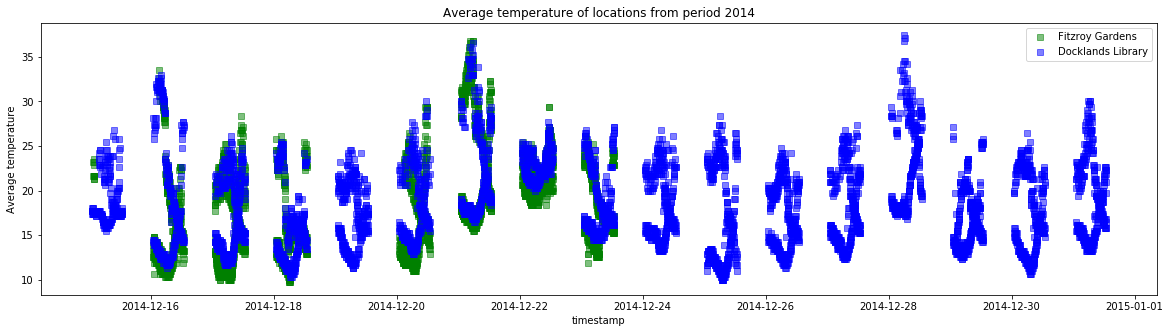

In [20]:
# model
plt.figure(figsize=(20,5))
location_filter = data.location == 'Fitzroy Gardens'
time_filter = data.ts < pd.Timestamp('2015-01-01')
data_filtered = data[location_filter & time_filter]
plt.plot(data_filtered.ts, data_filtered.temp_avg, 's', c='g', alpha=.5 , linewidth = .2)
plt.xlabel("timestamp")
plt.ylabel("Average temperature")
location_filter1 = data.location == 'Docklands Library'
time_filter1 = data.ts < pd.Timestamp('2015-01-01')
data_filtered1 = data[location_filter1 & time_filter1]
plt.plot(data_filtered1.ts, data_filtered1.temp_avg, 's', c='b', alpha=.5 , linewidth = .2)
plt.legend(["Fitzroy Gardens","Docklands Library"])
plt.title("Average temperature of locations from period 2014")
plt.show()

Can you color separate different boards?

Can your plot the median?

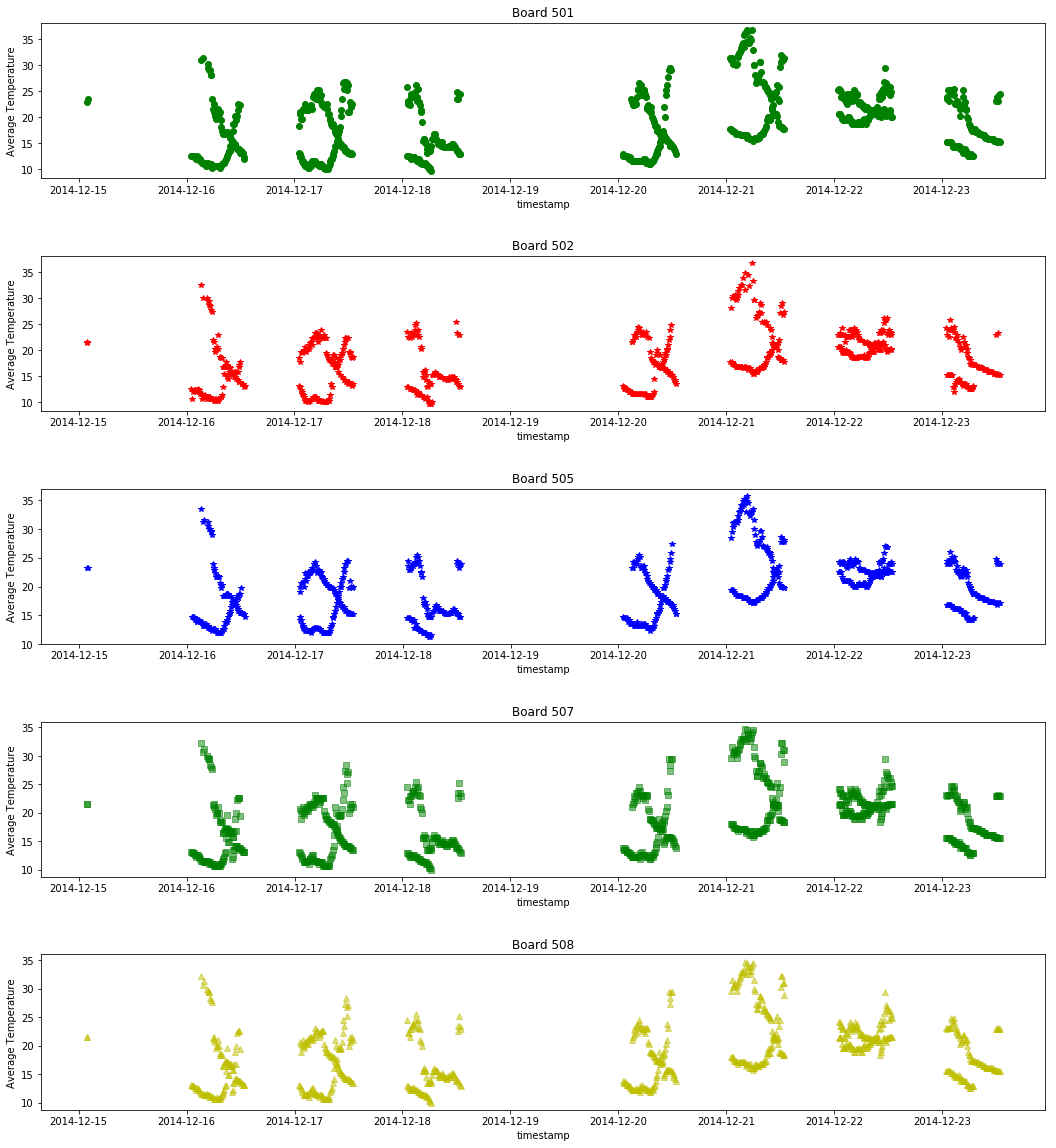

In [21]:
plt.figure(figsize=(18,20))                                        #plots for separate boards of Fitzroy gardens
#location_filter = data.location == 'Fitzroy Gardens'
time_filter = data.ts < pd.Timestamp('2015-01-01')
board_filter1 = data.boardid == 501
data_filtered1 = data[board_filter1 & time_filter]
board_filter2 = data.boardid == 502
data_filtered2 = data[board_filter2 & time_filter]
board_filter3 = data.boardid == 505
data_filtered3 = data[board_filter3 & time_filter]
board_filter4 = data.boardid == 507
data_filtered4 = data[board_filter4 & time_filter]
board_filter5 = data.boardid == 508
data_filtered5 = data[board_filter5 & time_filter]
plt.subplot(511)
plt.title('Board 501')
plt.xlabel('timestamp')
plt.ylabel('Average Temperature')
plt.plot(data_filtered1.ts, data_filtered1.temp_avg, 'o', c='g', alpha=1.0)
plt.subplot(512)
plt.title('Board 502')
plt.xlabel('timestamp')
plt.ylabel('Average Temperature')
plt.plot(data_filtered2.ts, data_filtered2.temp_avg, '*', c='r', alpha=1.0)
plt.subplot(513)
plt.title('Board 505')
plt.xlabel('timestamp')
plt.ylabel('Average Temperature')
plt.plot(data_filtered3.ts, data_filtered3.temp_avg, '*', c='b', alpha=1.0)
plt.subplot(514)
plt.title('Board 507')
plt.xlabel('timestamp')
plt.ylabel('Average Temperature')
plt.plot(data_filtered4.ts, data_filtered4.temp_avg, 's', c='g', alpha=.5)
plt.subplot(515)
plt.title('Board 508')
plt.xlabel('timestamp')
plt.ylabel('Average Temperature')
plt.plot(data_filtered4.ts, data_filtered4.temp_avg, '^', c='y', alpha=.5)
plt.subplots_adjust(hspace = .5)
plt.show()


C:\Users\Harini Pravin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


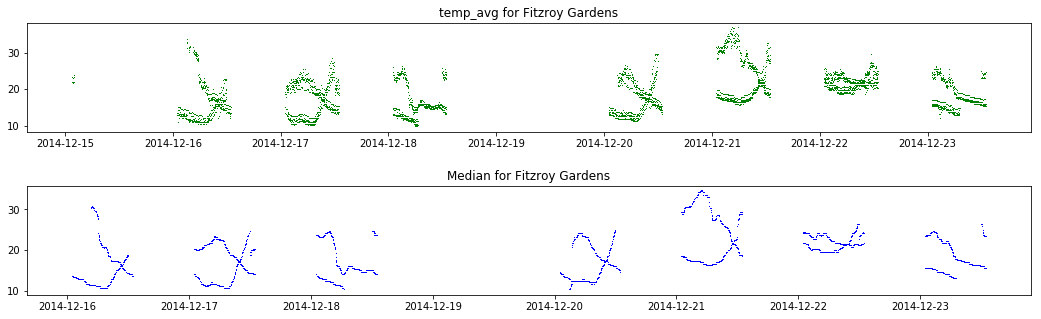

,timestamp,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,latitude,longitude,elevation,location,ts,Median
7109,12/23/2014 07:00:00 PM,507,12.9,12.9,12.9,62.7,62.7,62.7,63.9,63.9,63.9,-37.814922,144.982258,38.79,Fitzroy Gardens,2014-12-23 07:00:00,12.9
7110,12/23/2014 07:05:00 PM,501,12.6,12.6,12.6,65.6,65.6,65.6,61.2,61.2,61.2,-37.814808,144.980999,29.96,Fitzroy Gardens,2014-12-23 07:05:00,12.9
7113,12/23/2014 07:05:00 PM,508,13.9,13.9,13.9,59.9,59.9,59.9,52.6,52.6,52.6,-37.813408,144.979492,30.10,Fitzroy Gardens,2014-12-23 07:05:00,12.9
7114,12/23/2014 07:05:00 PM,502,13.2,13.2,13.2,69.1,69.1,69.1,61.4,61.4,61.4,-37.814610,144.979018,22.57,Fitzroy Gardens,2014-12-23 07:05:00,12.9
7115,12/23/2014 07:10:00 PM,505,14.5,14.5,14.5,53.2,53.2,53.2,63.0,63.0,63.0,-37.813073,144.980406,29.91,Fitzroy Gardens,2014-12-23 07:10:00,12.9


In [22]:
#plotting the median
plt.figure(figsize=(18,5))
location_filter = data.location == 'Fitzroy Gardens'
time_filter = data.ts < pd.Timestamp('2015-01-01')
data_filtered = data[location_filter & time_filter]
#data_filtered['Median'] = data_filtered.temp_avg.rolling(25).median()
data_filtered['Median'] = data_filtered.loc[:,'temp_avg'].rolling(25).median()  #rolling median is used to smooth out short term
plt.subplot(2,1,1)                                                              #fluctuations
plt.title('temp_avg for Fitzroy Gardens')
plt.plot(data_filtered.ts, data_filtered.temp_avg, ',', c='g', alpha=1.0)
plt.subplot(2,1,2)
plt.title('Median for Fitzroy Gardens')
#data_filtered['Median'].plot()
plt.plot(data_filtered.ts, data_filtered.Median,',', c='b', alpha=1.0)
plt.subplots_adjust(hspace = .5)
plt.show()
data_filtered.tail()



##Problems faced in assignment:
1. For the median printout, I am not able to understand how to populate the elevation for Docksland library,since there are no values for elevation for it in the dataframe --missing data.
2. Still facing issues in using .iloc. Getting key error.Hence used data filters for the median and std printouts. 
3. not able to understand the graph plotted for median. There are no errors but need some more insight to verify the output.
4. Trying to pass a selected column as an array to a calling function.facing length mismatch issues. used data filters instead.